In [7]:
import pandas as pd
import numpy as np

In [9]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

FileNotFoundError: ignored

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

## UNIVARIATE

In [ ]:
sns.countplot(df['Gender'])

NameError: ignored

## BI_VARIATE

In [ ]:
sns.countplot(data=df,x='Geography',hue='Gender')

NameError: ignored

## MULTIVARIATE

In [ ]:
sns.pairplot(data=df[['Age','Tenure','EstimatedSalary','CreditScore','Balance','Geography']],hue='Geography')

NameError: ignored

## Descriptive Statistics

In [ ]:
df['Age'].median(), df['Balance'].mean()

NameError: ignored

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].median())

NameError: ignored

In [ ]:
df

In [ ]:
df[df['Age']>40]

## Handle The Missing Values

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.notnull().sum()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [ ]:
import pandas as pd
data = pd.read_csv("/content/Churn_Modelling.csv") 
bool_series = pd.isnull(data["Gender"])
data[bool_series]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
import pandas as pd
data = pd.read_csv("/content/Churn_Modelling.csv") 
bool_series = pd.notnull(data["Gender"])
data[bool_series]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## FINDING OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


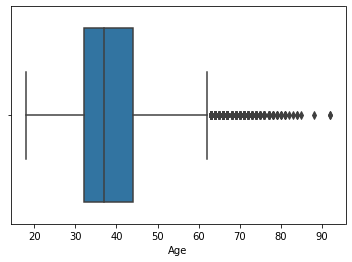

In [ ]:
sns.boxplot(df['Age'])

## REPLACING OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


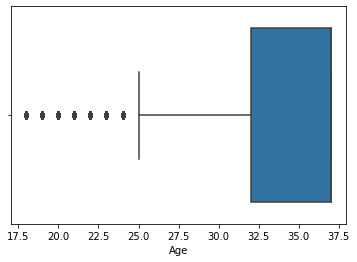

In [ ]:
median = float(df['Age'].median())
df["Age"] = np.where(df["Age"] > median, median, df['Age'])
sns.boxplot(df['Age'],data=df)


## CATERGORICAL COLUMN AND ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count

In [ ]:
le = LabelEncoder()

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
count(df['Geography'])

Counter({'France': 5014, 'Spain': 2477, 'Germany': 2509})

In [ ]:
df['Geography']=le.fit_transform(df['Geography'])

In [ ]:
count(df['Geography'])

Counter({0: 5014, 2: 2477, 1: 2509})

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,37.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,37.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,37.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,37.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,37.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,Male,37.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,Male,37.0,3,75075.31,2,1,0,92888.52,1


In [ ]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [ ]:
count(df['Surname'])

Counter({'Hargrave': 1,
         'Hill': 17,
         'Onio': 8,
         'Boni': 14,
         'Mitchell': 20,
         'Chu': 22,
         'Bartlett': 4,
         'Obinna': 2,
         'He': 18,
         'H?': 19,
         'Bearce': 1,
         'Andrews': 6,
         'Kay': 5,
         'Chin': 16,
         'Scott': 29,
         'Goforth': 1,
         'Romeo': 1,
         'Henderson': 16,
         'Muldrow': 1,
         'Hao': 12,
         'McDonald': 19,
         'Dellucci': 13,
         'Gerasimov': 2,
         'Mosman': 1,
         'Yen': 14,
         'Maclean': 24,
         'Young': 20,
         'Nebechi': 6,
         'McWilliams': 2,
         'Lucciano': 11,
         'Azikiwe': 5,
         'Odinakachukwu': 4,
         'Sanderson': 4,
         'Maggard': 2,
         'Clements': 9,
         'Lombardo': 15,
         'Watson': 20,
         'Lorenzo': 12,
         'Armstrong': 1,
         'Cameron': 19,
         'Hsiao': 8,
         'Clarke': 4,
         'Osborne': 6,
         'Lavine'

In [ ]:
df['Surname']=le.fit_transform(df['Surname'])

In [ ]:
count(df['Surname'])

Counter({1115: 1,
         1177: 17,
         2040: 8,
         289: 14,
         1822: 20,
         537: 22,
         177: 4,
         2000: 2,
         1146: 18,
         1081: 19,
         195: 1,
         83: 6,
         1369: 5,
         515: 16,
         2389: 29,
         1021: 1,
         2307: 1,
         1154: 16,
         1872: 1,
         1108: 12,
         1736: 19,
         697: 13,
         991: 2,
         1862: 1,
         2880: 14,
         1642: 24,
         2897: 20,
         1908: 6,
         1772: 2,
         1609: 11,
         133: 5,
         2007: 4,
         2364: 4,
         1655: 2,
         567: 9,
         1587: 15,
         2775: 20,
         1594: 12,
         105: 1,
         396: 19,
         1231: 8,
         564: 4,
         2067: 6,
         1508: 1,
         241: 10,
         2668: 4,
         1689: 29,
         2016: 3,
         2888: 11,
         347: 14,
         477: 3,
         2645: 20,
         1983: 4,
         2115: 4,
         2895: 1,
  

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,Female,37.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,Female,37.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,Female,37.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,Female,37.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,Female,37.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,Male,37.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,Male,37.0,3,75075.31,2,1,0,92888.52,1


# Method 2 (Feature map)

In [ ]:
count(df['NumOfProducts'])

Counter({1: 5084, 3: 266, 2: 4590, 4: 60})

In [ ]:
df['NumOfProducts']=df['NumOfProducts'].replace(['No','Yes'],[0,1])

In [ ]:
count(df['NumOfProducts'])

Counter({1: 5084, 3: 266, 2: 4590, 4: 60})

# Method 3 (One hot encoding)

In [ ]:
df['Geography']

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int64

In [ ]:
Geography = pd.get_dummies(df['Geography'],prefix='Geography')

In [ ]:
Geography

,Geography_0,Geography_1,Geography_2
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


# Split the data into dependent and independent variables in python

In [ ]:
x= df.iloc[ : , :-1]

y= df.iloc[ : , 4]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,Female,37.0,2,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,Female,37.0,1,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,Female,37.0,8,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,Female,37.0,1,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,Female,37.0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,Male,37.0,5,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,Male,35.0,10,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,Female,36.0,7,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,Male,37.0,3,75075.31,2,1,0,92888.52


In [ ]:
y

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int64

In [ ]:
x= df.iloc[ 1:2 , :-1]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,2,15647311,1177,608,2,Female,37.0,1,83807.86,1,0,1,112542.58


#scaling the independent variable 

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
x=df.iloc[:,0:3]
y=df['NumOfProducts']
x

,RowNumber,CustomerId,Surname
0,1,15634602,1115
1,2,15647311,1177
2,3,15619304,2040
3,4,15701354,289
4,5,15737888,1822
...,...,...,...
9995,9996,15606229,1999
9996,9997,15569892,1336
9997,9998,15584532,1570
9998,9999,15682355,2345


In [ ]:
y

0       1
1       1
2       3
3       2
4       1
       ..
9995    2
9996    1
9997    1
9998    2
9999    1
Name: NumOfProducts, Length: 10000, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=11)

In [ ]:
xtrain

,RowNumber,CustomerId,Surname
1264,1265,15732199,993
5376,5377,15602500,1694
2037,2038,15678146,2845
6485,6486,15635197,1016
1600,1601,15748718,1037
...,...,...,...
1293,1294,15687752,1067
4023,4024,15629187,2611
7259,7260,15718921,1183
5200,5201,15641298,617


In [ ]:
xtest

,RowNumber,CustomerId,Surname
3104,3105,15654230,1808
6353,6354,15676353,831
8689,8690,15684769,2808
5857,5858,15813659,909
6011,6012,15783007,2113
...,...,...,...
8125,8126,15666982,2496
8444,8445,15793641,839
2167,2168,15780846,2248
8043,8044,15616525,2485


In [ ]:
st = StandardScaler()
nm = MinMaxScaler()

In [ ]:
s_xtrain = st.fit_transform(xtrain)
s_xtrain

array([[-1.29671985,  0.57944472, -0.60566716],
       [ 0.12810842, -1.2259028 ,  0.22108595],
       [-1.02887154, -0.17294697,  1.57856501],
       ...,
       [ 0.7805772 ,  0.39462137, -0.38158287],
       [ 0.06712355, -0.68585335, -1.04911819],
       [-0.42664597,  0.25658151,  0.18098665]])

#Split the data into training and testing

In [ ]:
s_xtest = st.transform(xtest)

In [ ]:
s_xtest

array([[-0.65915078, -0.50584615,  0.35553652],
       [ 0.46664373, -0.19790466, -0.79672851],
       [ 1.27607924, -0.080758  ,  1.53492754],
       ...,
       [-0.9838259 ,  1.2565875 ,  0.87446857],
       [ 1.05223706, -1.03068157,  1.15398424],
       [-0.03093735, -0.11942642,  1.47595799]])

In [ ]:
n_xtrain = nm.fit_transform(xtrain)
n_xtrain

array([[0.12642529, 0.66600394, 0.33879222],
       [0.53770754, 0.14715813, 0.57795974],
       [0.20374075, 0.44977118, 0.97065848],
       ...,
       [0.72604521, 0.61288684, 0.40361651],
       [0.52010402, 0.30236503, 0.21050836],
       [0.37757552, 0.57321503, 0.5663596 ]])

In [ ]:
n_xtest = nm.transform(xtest)
n_xtest

array([[0.31046209, 0.35409799, 0.61685432],
       [0.63542709, 0.44259849, 0.28352098],
       [0.86907381, 0.47626572, 0.9580348 ],
       ...,
       [0.21674335, 0.86061062, 0.76697373],
       [0.80446089, 0.20326351, 0.8478335 ],
       [0.49179836, 0.46515265, 0.94097578]])